Default settings and imports

In [2]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

Creating the dataset

In [3]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

Dataset plot

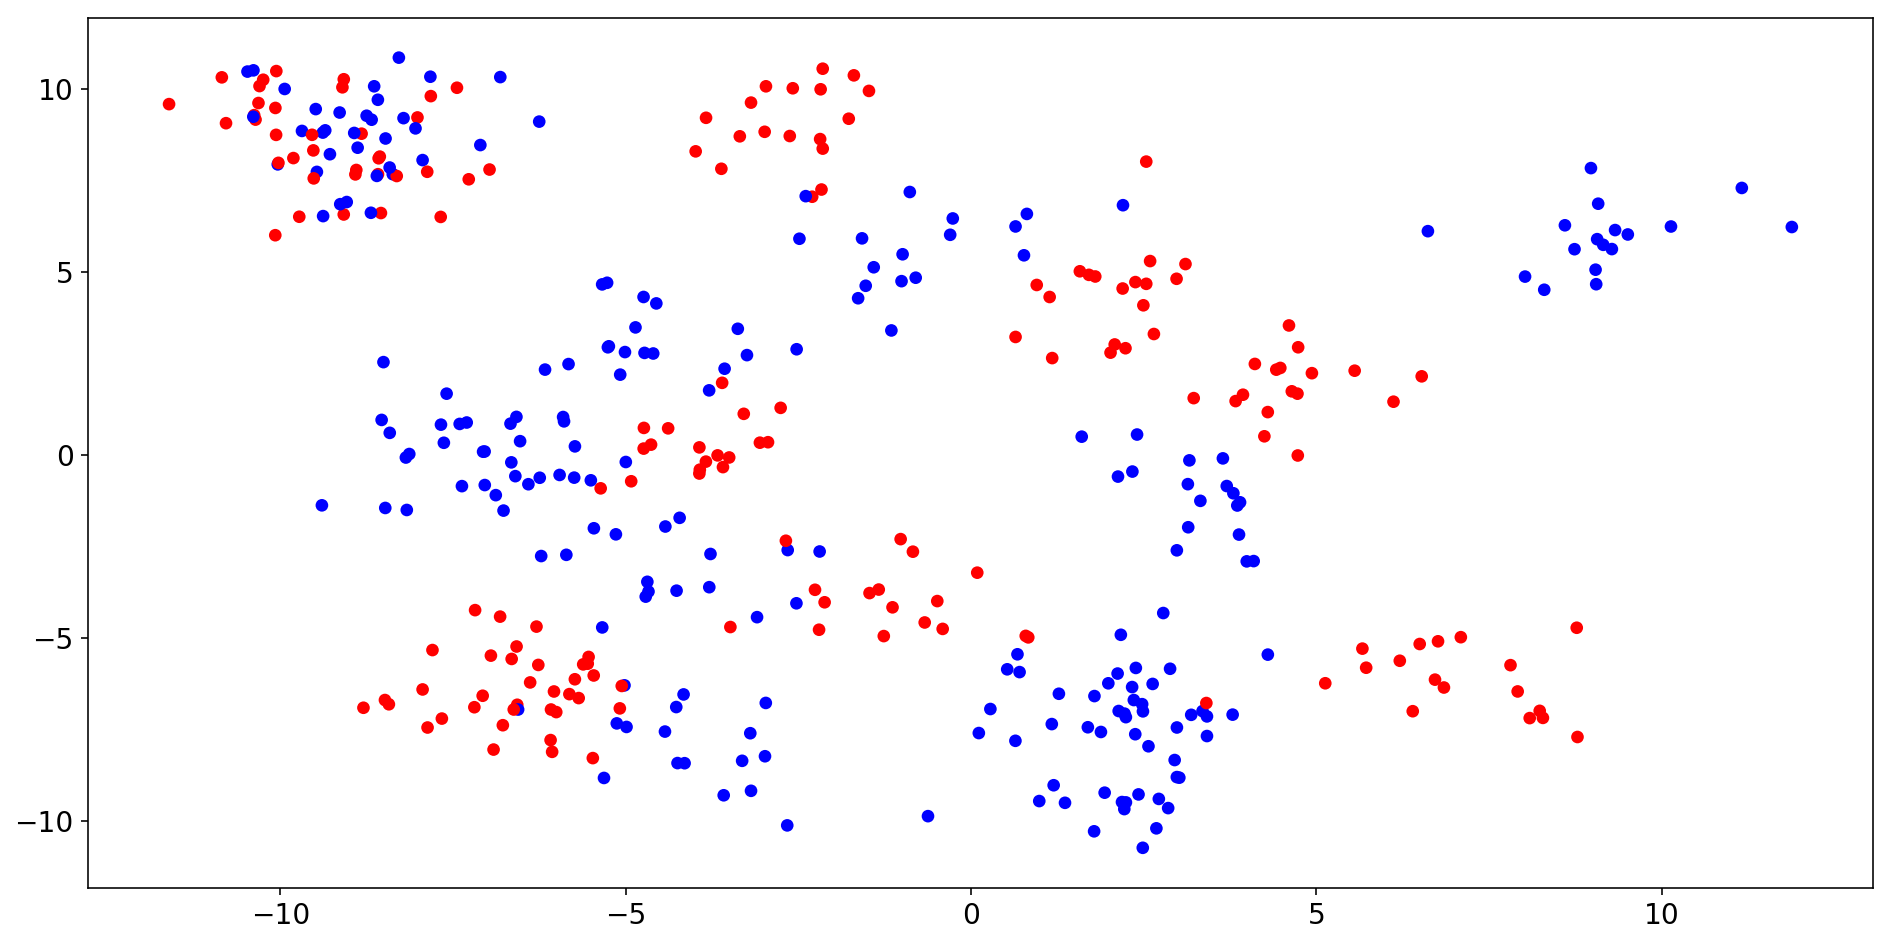

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, lw=0, s=40)

Dataset split into a training and testing set: to avoid possible bias, the samples are splited randomly into two datasets of equal size 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

As it is not clear what is the optimal number of neigbours, n_neighbours=5 is selected ad hoc.

In [6]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Evaluation of the performance of the classifier on training dataset:
    

In [7]:
TrainingScore = clf.score(X_train, y_train)
print("Test Training score is: ",TrainingScore)

Test Training score is:  0.91


Evaluation of the performance of the classifier on the testing dataset:


In [8]:
TestingScore  = clf.score(X_test, y_test)
print("Testing score is: ",TestingScore)

Testing score is:  0.86


To evaluate the effect of changing the split ration, the process is automatized in EvaluatePerformance function:


In [9]:
def EvaluatePerformance(SplitRation):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=SplitRation)
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)
    TrainingScore = clf.score(X_train, y_train)
    TestingScore  = clf.score(X_test, y_test)
    Result = [TrainingScore, TestingScore]
    return Result

To see the trend, the function is called in the loop and the results are shown in the graph:


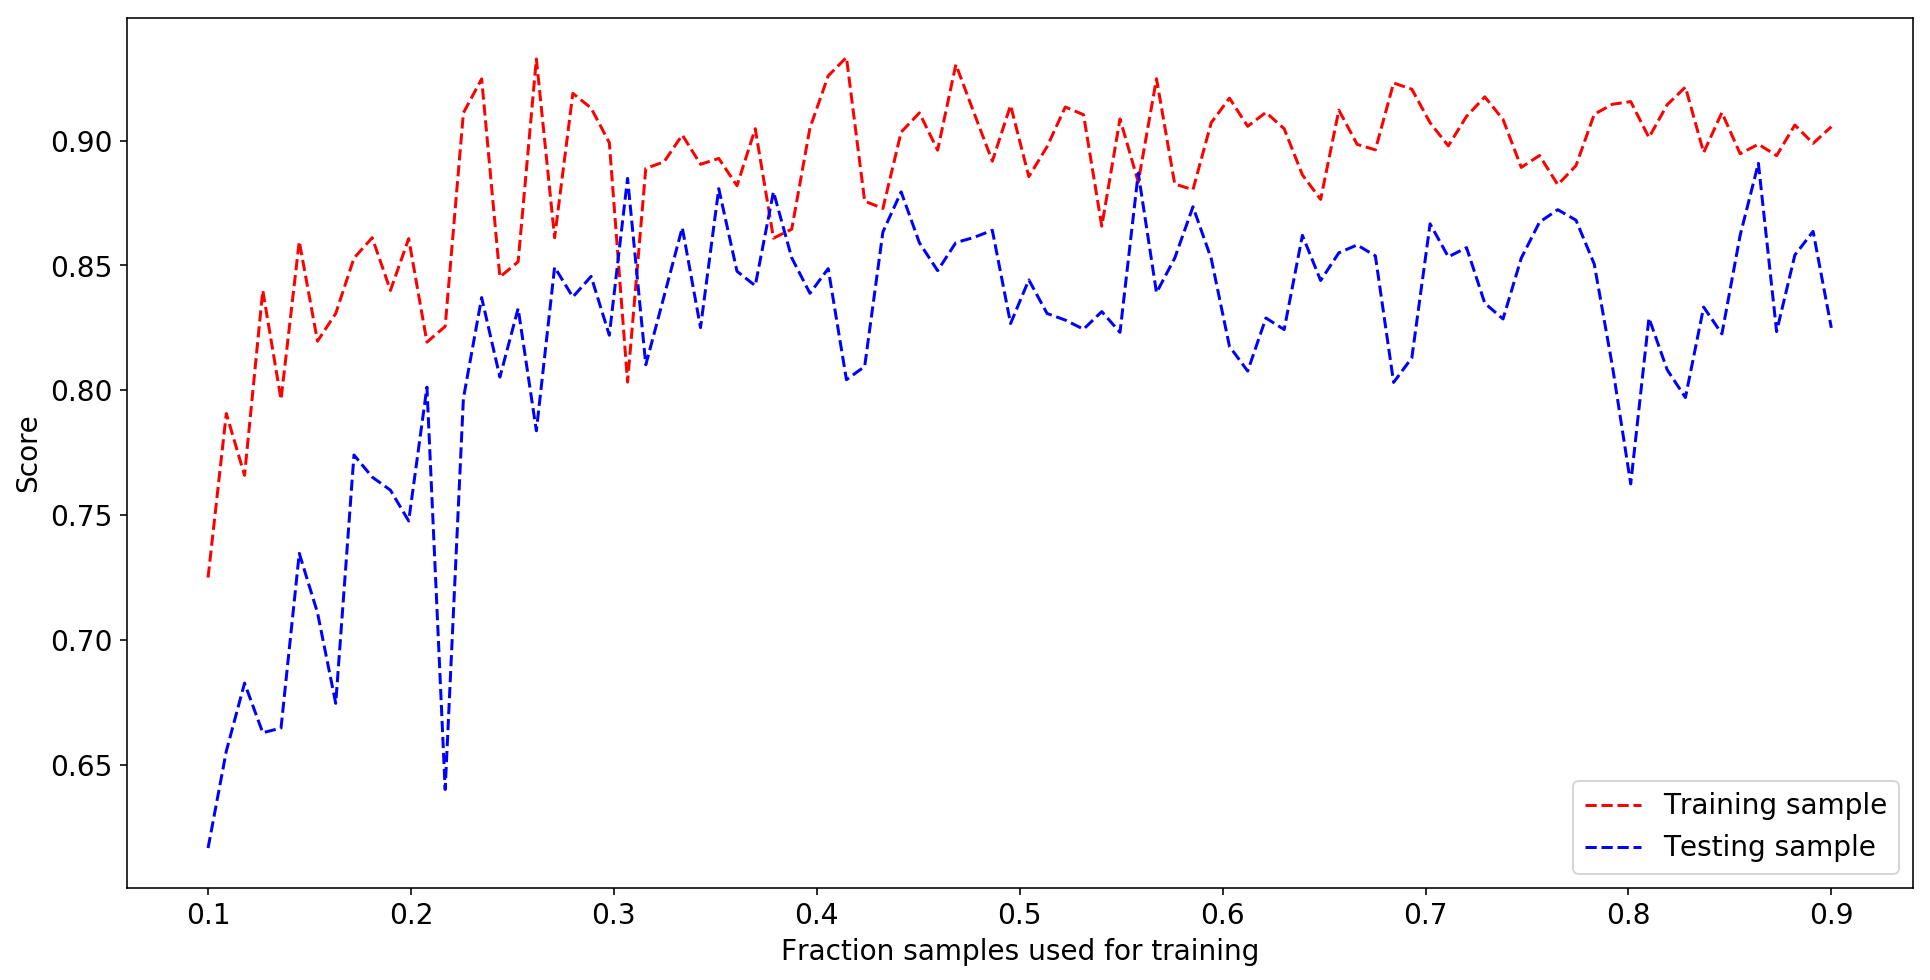

In [10]:
SplitRatioSpace = np.linspace(0.1,0.9,90)
Results = list(map(EvaluatePerformance,SplitRatioSpace))
Scores = list(zip(*[(a[0], a[1]) for a in Results]))
plt.plot(SplitRatioSpace, Scores[0], 'r--',  label="Training sample") 
plt.plot(SplitRatioSpace, Scores[1], 'b--',  label="Testing sample" )
plt.legend(loc='best')
plt.xlabel("Fraction samples used for training")
plt.ylabel("Score")



    

As the results are fluctuating, it is likely that a single measurement is not sufficient, therefore, the entire procedure is repeated multiple times and average values are calculated.

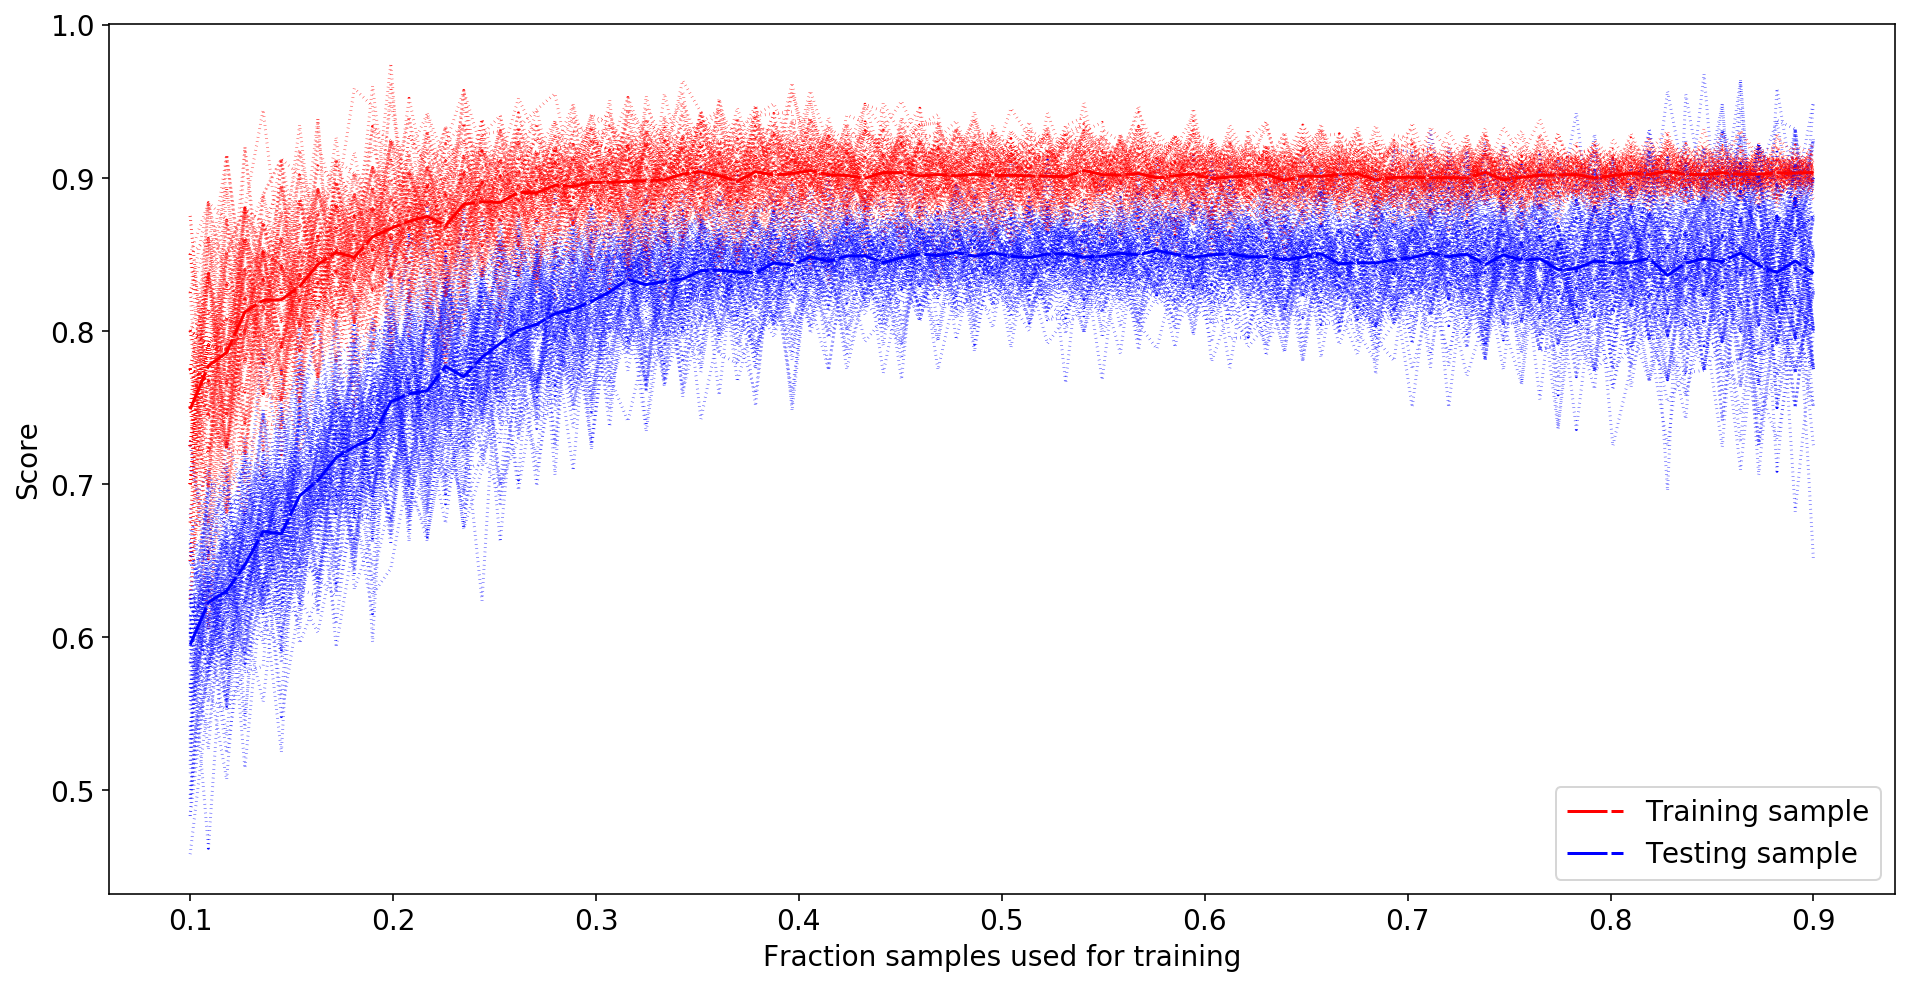

In [11]:
def GetScoresForRandomOneRandomState(StateNumber, SplitRatioSpace):
    X, y = make_blobs(n_samples=400, centers=23, random_state=StateNumber)
    y = np.take(labels, (y < 20))
    
    Results = list(map(EvaluatePerformance,SplitRatioSpace))
    Scores = list(zip(*[(a[0], a[1]) for a in Results]))
    return Scores

SplitRatioSpace = np.linspace(0.1,0.9,90)
AverageTrainingScore = np.zeros(90)
AverageTestingScore  = np.zeros(90)
NumberOfRepetitions = 100
for i in range (1,NumberOfRepetitions+1) :
    NScores = GetScoresForRandomOneRandomState(i, SplitRatioSpace)
    plt.plot(SplitRatioSpace, NScores[0], 'r--', dashes=(0.1,1)) 
    plt.plot(SplitRatioSpace, NScores[1], 'b--', dashes=(0.1,1))
    AverageTrainingScore +=  NScores[0] 
    AverageTestingScore  +=  NScores[1] 
    
AverageTrainingScore/=NumberOfRepetitions
AverageTestingScore/=NumberOfRepetitions

plt.plot(SplitRatioSpace, AverageTrainingScore, 'r--', dashes=(10,1), label="Training sample") 
plt.plot(SplitRatioSpace, AverageTestingScore, 'b--', dashes=(10,1), label="Testing sample" )
plt.legend(loc='best')
plt.xlabel("Fraction samples used for training")
plt.ylabel("Score")
    

According to the Graph above, there is not peaking maximum in score as  40% or higher fraction for training lead to unchanged results. This is probably caused by the fact that when less than 40% of sample is devoted to training, the training cannot recognize all the features in the data which are found above this treshold. Therefore, there is no best way how to split the data. Nevertheless, there is a bad way how to split data if less than 40% of the sample is intended for training. As expected, the testing sample has always slidely worse performace than the training sample as the clasifier in use is adjusted on the training sample.

Now we use 50% of data for training and 50% for testing and evaluate impact of the number of knearestneighbours:

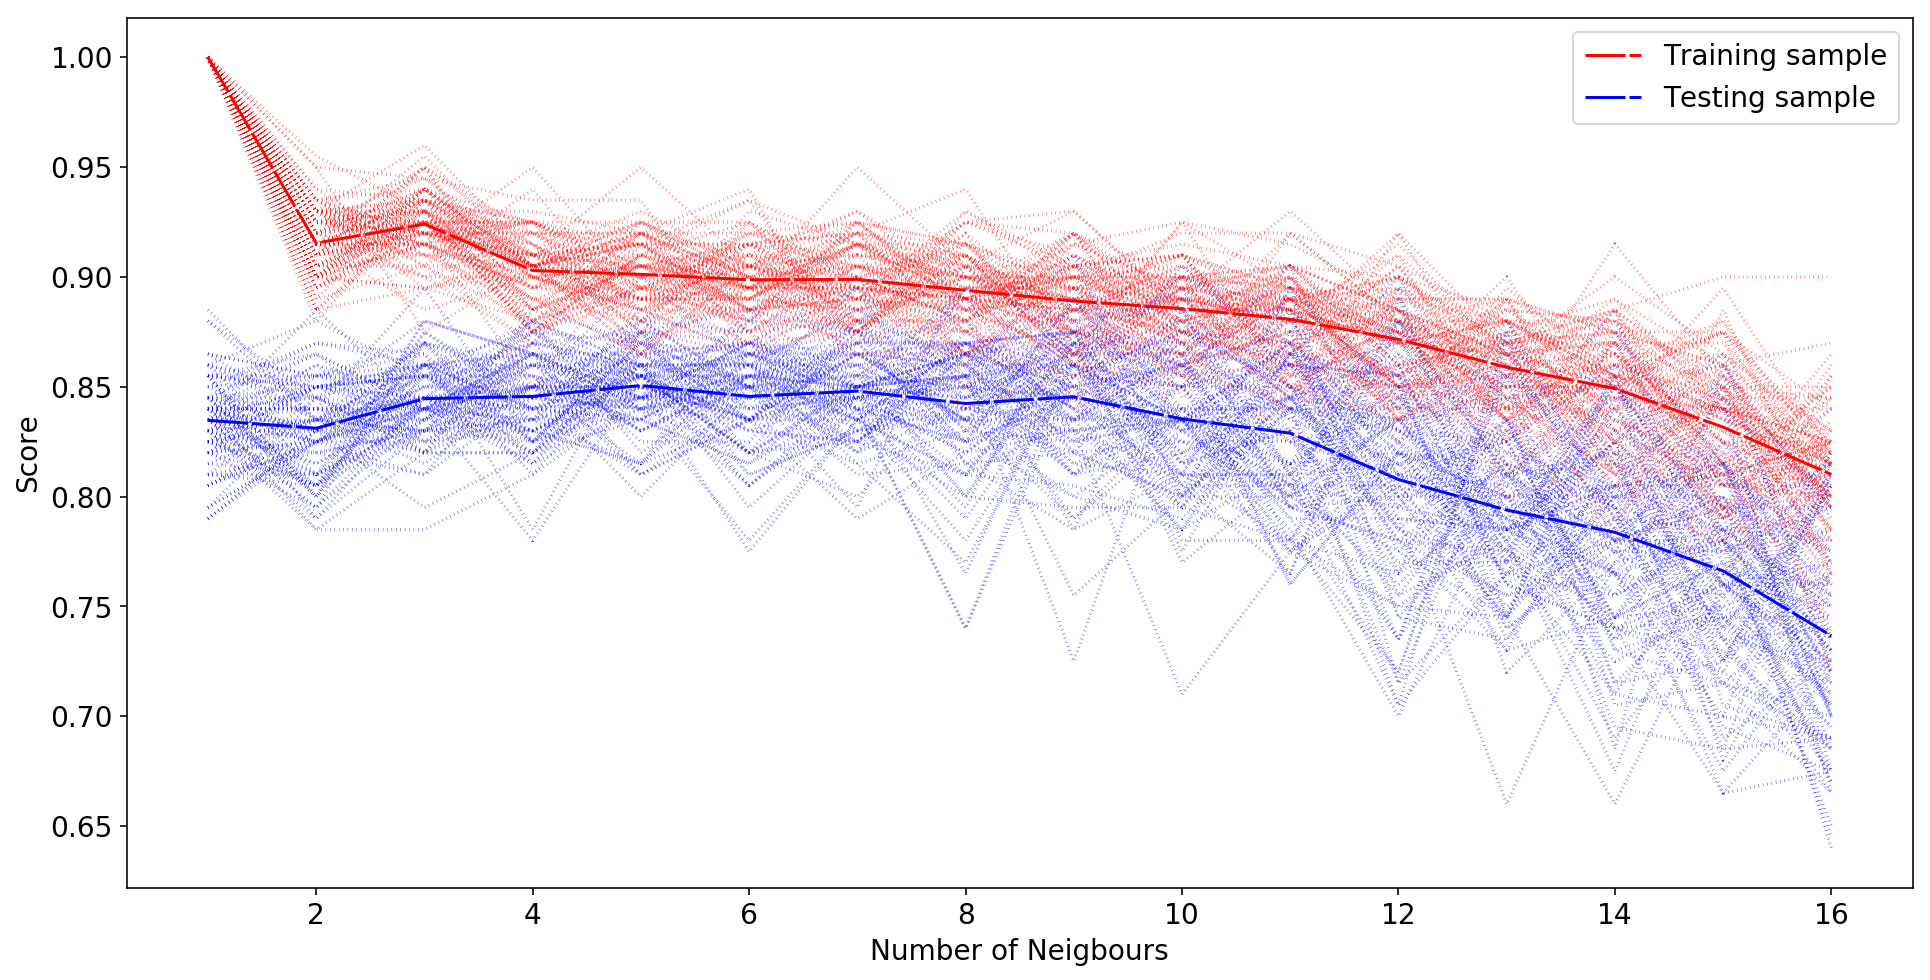

In [12]:
def EvaluatePerformanceNeighbour(NumberOfNeigbours):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
    clf = KNeighborsClassifier(n_neighbors=NumberOfNeigbours)
    clf.fit(X_train, y_train)
    TrainingScore = clf.score(X_train, y_train)
    TestingScore  = clf.score(X_test, y_test)
    Result = [TrainingScore, TestingScore]
    return Result

def GetScoresForRandomOneRandomStateNeighbours(StateNumber, NumberOfNeigbours):
    X, y = make_blobs(n_samples=400, centers=23, random_state=StateNumber)
    y = np.take(labels, (y < 20))
    Results = list(map(EvaluatePerformanceNeighbour,NumberOfNeigboursSpace))
    Scores = list(zip(*[(a[0], a[1]) for a in Results]))
    return Scores

MaximumNumberOfNeigbours = 16
NumberOfNeigboursSpace = range(1,MaximumNumberOfNeigbours+1)

NeigboursAverageTrainingScore = np.zeros(MaximumNumberOfNeigbours)
NeigboursAverageTestingScore  = np.zeros(MaximumNumberOfNeigbours)
NumberOfRepetitions = 100
for i in range (1,NumberOfRepetitions+1) :
    NNScores = GetScoresForRandomOneRandomStateNeighbours(i, NumberOfNeigboursSpace)
    plt.plot(NumberOfNeigboursSpace, NNScores[0], 'r--', dashes=(0.1,1)) 
    plt.plot(NumberOfNeigboursSpace, NNScores[1], 'b--', dashes=(0.1,1))
    NeigboursAverageTrainingScore += NNScores[0] 
    NeigboursAverageTestingScore  += NNScores[1] 
    
NeigboursAverageTrainingScore/=NumberOfRepetitions
NeigboursAverageTestingScore/=NumberOfRepetitions

plt.plot(NumberOfNeigboursSpace, NeigboursAverageTrainingScore, 'r--', dashes=(10,1), label="Training sample") 
plt.plot(NumberOfNeigboursSpace, NeigboursAverageTestingScore, 'b--', dashes=(10,1), label="Testing sample" )
plt.legend(loc='best')
plt.xlabel("Number of Neigbours")
plt.ylabel("Score")

Figure about suggests that the best number of kNearestNeigbours is 3 but any from 3 to 9 would be giving a similar performace. Both training and testing score is following the same trend with increasing number of required nearest neigbours. However in case of one neigbours used the training sample has by construction perfect but this is not the case for the testing sample. 

The case with 4 neighbours is more complex than with 10. In case of 4 neighbours, the classifier needs to build finest tructure in parameter hyperspace based on training sample in comparison with use of 10.

To conclude,  best performing settings for this sample would be to split the training and testing sample equally (or with ratio higher than 40% for training sample)  and to choose 3 (or between 3 and 9) as number of nearest neigbours.